In [220]:
#Purpose: clean SESAR data and store them to cleanedfile, train file and test file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [179]:
original = pd.read_csv('../Collections_data/SESAR_5000_original.csv')
core = pd.read_csv('../Collections_data/SESAR_5000_core.csv')

In [180]:
original = original.drop([original.columns[0]], axis=1)
core = core.drop([core.columns[0]], axis=1)

In [181]:
original.head()

,@id,igsn,@context,registrant.name,registrant.identifiers.id,registrant.identifiers.kind,description.log,description.material,description.collector,description.publisher.@id,description.publisher.url,description.publisher.name,description.publisher.@type,description.publisher.contactPoint.url,description.publisher.contactPoint.name,description.publisher.contactPoint.@type,description.publisher.contactPoint.email,description.publisher.contactPoint.contactType,description.igsnPrefix,description.sampleName,description.sampleType,description.geoLocation.geo,description.geoLocation.@type,description.contributors,description.collectorDetail,description.supplementMetadata.purpose,description.supplementMetadata.depthMax,description.supplementMetadata.depthMin,description.supplementMetadata.document,description.supplementMetadata.locality,description.supplementMetadata.province,description.supplementMetadata.sampleId,description.supplementMetadata.childIGSN,description.supplementMetadata.elevation,description.supplementMetadata.otherName,description.supplementMetadata.depthScale,description.supplementMetadata.elevationUnit,description.supplementMetadata.geologicalAge,description.supplementMetadata.sampleComment,description.supplementMetadata.currentArchive,description.supplementMetadata.geologicalUnit,description.supplementMetadata.navigationType,description.supplementMetadata.publicationUrl,description.supplementMetadata.originalArchive,description.supplementMetadata.externalSampleId,description.supplementMetadata.currentArchiveContact,description.collectionStartDate,description.collectionDatePrecision,description.parentIdentifier,description.supplementMetadata.siblingIGSN,description.supplementMetadata.platformType,description.supplementMetadata.cruiseFieldPrgrm,description.collectionMethod,description.supplementMetadata.size,description.supplementMetadata.sizeUnit,description.collectionMethodDescr,description.description,description.supplementMetadata.fieldName,description.supplementMetadata.primaryLocationType,description.supplementMetadata.primaryLocationName,description.supplementMetadata.country,description.supplementMetadata.localityDescription,description.supplementMetadata.locationDescription,description.supplementMetadata.county,description.supplementMetadata.zone,description.supplementMetadata.easting,description.supplementMetadata.northing,description.supplementMetadata.city,description.supplementMetadata.ageMax,description.supplementMetadata.ageMin,description.supplementMetadata.ageUnit,description.supplementMetadata.elevationEnd,description.supplementMetadata.verticalDatum,description.collectionEndDate,description.supplementMetadata.launchId,description.supplementMetadata.platformName,description.supplementMetadata.launchTypeName,description.supplementMetadata.launchPlatformName,description.supplementMetadata.platformDescr,description.supplementMetadata.classificationComment
0,https://data.geosamples.org/sample/igsn/GBP300156,GBP300156,https://raw.githubusercontent.com/IGSN/igsn-js...,IEDA,https://www.geosamples.org,uri,"[{'type': 'registered', 'timestamp': '2016-07-...",Rock,Great Bear Petroleum,https://www.geosamples.org,https://www.geosamples.org,EarthChem,Organization,https://www.geosamples.org/contact/,Information Desk,ContactPoint,info@geosamples.org,Customer Service,GBP,50223200290000 Alkaid1,Cuttings,"[{'@type': 'GeoCoordinates', 'latitude': '69.9...",Place,"[{'@type': 'Role', 'roleName': 'Sample Owner',...",ed@greatbearpetro.com,Cuttings analysis,5180.0,5150.0,[],50223200290000,AK,4102676,[],59.8,['5150-5180 ft MD Envelope of air-dried cuttin...,MD Feet,meters,Tertiary,Envelope of air-dried cuttings,"Biomarker Technologies, Inc.","Staines Tongue, Sagavarnirktok Fm.",GPS,[],Solsten,50223200290000 Alkaid1,allegra@geomodelingsolutions.com,2015-03-14,day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://data.geosamples.org/sample

In [199]:
CVs = core[['hasContextCategory', 'hasMaterialCategory', 'hasSpecimenCategory']]
CVs['hasContextCategory'].str.replace("[^\w\s]", "", regex=True).value_counts()/5000

Not Provided                                    0.6452
Earth interior                                  0.3380
Subaerial surface environment                   0.0050
Marine water body bottom                        0.0038
Terrestrial water body                          0.0028
Lake river or stream bottom                     0.0012
Marine water body                               0.0012
Subsurface fluid reservoir                      0.0012
Marine biome                                    0.0010
Earth interior Subaerial surface environment    0.0006
Name: hasContextCategory, dtype: float64

0 3226
1 1690
2 25
3 19
4 14
5 6
6 6
7 6
8 5
9 3


Text(0.5, 0, 'count')

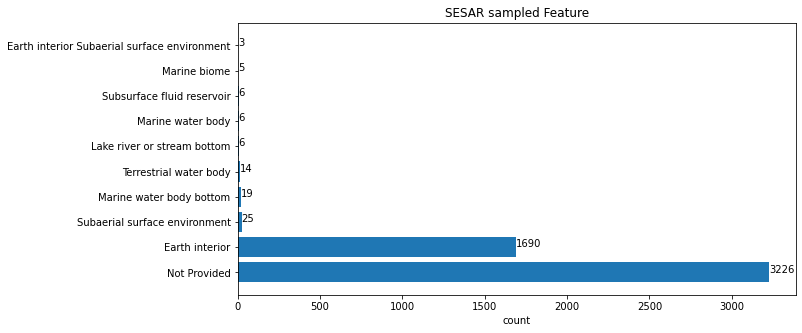

In [252]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot()
dis = CVs['hasContextCategory'].value_counts()
p = ax.barh(dis.keys().str.replace("[^\w\s]", "", regex=True), dis)
for i, rect in enumerate(dis.index):
    print(i, dis[rect])
    ax.text(dis[rect], i,  dis[rect])
plt.title('SESAR sampled Feature')
plt.xlabel('count')

In [186]:
CVs['hasMaterialCategory'].str.replace("[^\w\s]", "", regex=True).value_counts()/5000

Not Provided                                     0.4916
Rock                                             0.2038
Mineral                                          0.1348
Organic material                                 0.1072
Sediment                                         0.0422
Water                                            0.0148
Soil                                             0.0050
Organic material Biogenic nonorganic material    0.0002
Gaseous material                                 0.0002
Mineral Organic material                         0.0002
Name: hasMaterialCategory, dtype: float64

0 2458
1 1019
2 674
3 536
4 211
5 74
6 25
7 1
8 1
9 1


Text(0.5, 0, 'count')

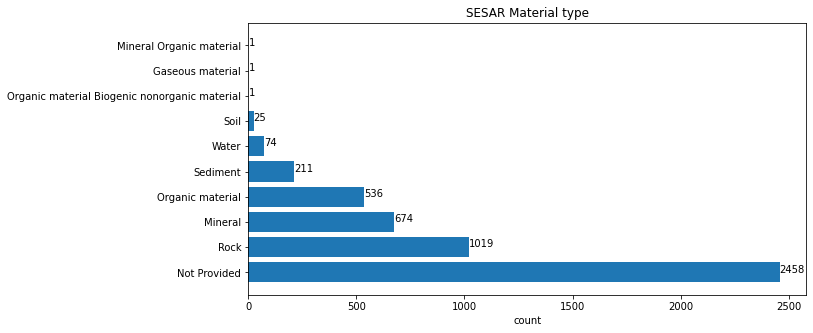

In [253]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot()
dis = CVs['hasMaterialCategory'].value_counts()
p = ax.barh(dis.keys().str.replace("[^\w\s]", "", regex=True), dis)
for i, rect in enumerate(dis.index):
    print(i, dis[rect])
    ax.text(dis[rect], i,  dis[rect])
plt.title('SESAR Material type')
plt.xlabel('count')

In [187]:
CVs['hasSpecimenCategory'].str.replace("[^\w\s]", "", regex=True).value_counts()/5000

Other solid object        0.9178
Aggregation               0.0508
Not Provided              0.0202
Analytical preparation    0.0074
Liquid or gas sample      0.0034
Experiment product        0.0004
Name: hasSpecimenCategory, dtype: float64

0 4589
1 254
2 101
3 37
4 17
5 2


Text(0.5, 0, 'count')

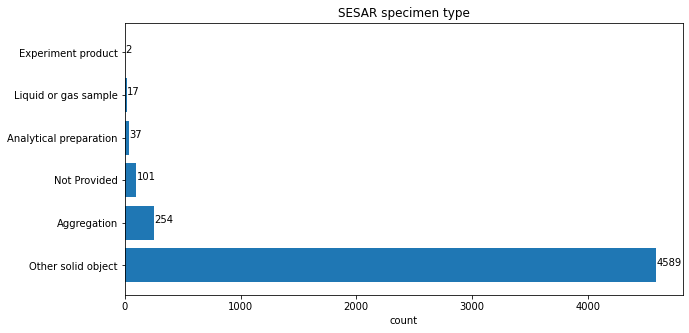

In [254]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot()
dis = CVs['hasSpecimenCategory'].value_counts()
p = ax.barh(dis.keys().str.replace("[^\w\s]", "", regex=True), dis)
for i, rect in enumerate(dis.index):
    print(i, dis[rect])
    ax.text(dis[rect], i,  dis[rect])
plt.title('SESAR specimen type')
plt.xlabel('count')

In [217]:
df = pd.concat([original, CVs], axis=1)
df.replace(np.nan, '', regex=True, inplace=True)

,@id,igsn,@context,registrant.name,registrant.identifiers.id,registrant.identifiers.kind,description.log,description.material,description.collector,description.publisher.@id,description.publisher.url,description.publisher.name,description.publisher.@type,description.publisher.contactPoint.url,description.publisher.contactPoint.name,description.publisher.contactPoint.@type,description.publisher.contactPoint.email,description.publisher.contactPoint.contactType,description.igsnPrefix,description.sampleName,description.sampleType,description.geoLocation.geo,description.geoLocation.@type,description.contributors,description.collectorDetail,description.supplementMetadata.purpose,description.supplementMetadata.depthMax,description.supplementMetadata.depthMin,description.supplementMetadata.document,description.supplementMetadata.locality,description.supplementMetadata.province,description.supplementMetadata.sampleId,description.supplementMetadata.childIGSN,description.supplementMetadata.elevation,description.supplementMetadata.otherName,description.supplementMetadata.depthScale,description.supplementMetadata.elevationUnit,description.supplementMetadata.geologicalAge,description.supplementMetadata.sampleComment,description.supplementMetadata.currentArchive,description.supplementMetadata.geologicalUnit,description.supplementMetadata.navigationType,description.supplementMetadata.publicationUrl,description.supplementMetadata.originalArchive,description.supplementMetadata.externalSampleId,description.supplementMetadata.currentArchiveContact,description.collectionStartDate,description.collectionDatePrecision,description.parentIdentifier,description.supplementMetadata.siblingIGSN,description.supplementMetadata.platformType,description.supplementMetadata.cruiseFieldPrgrm,description.collectionMethod,description.supplementMetadata.size,description.supplementMetadata.sizeUnit,description.collectionMethodDescr,description.description,description.supplementMetadata.fieldName,description.supplementMetadata.primaryLocationType,description.supplementMetadata.primaryLocationName,description.supplementMetadata.country,description.supplementMetadata.localityDescription,description.supplementMetadata.locationDescription,description.supplementMetadata.county,description.supplementMetadata.zone,description.supplementMetadata.easting,description.supplementMetadata.northing,description.supplementMetadata.city,description.supplementMetadata.ageMax,description.supplementMetadata.ageMin,description.supplementMetadata.ageUnit,description.supplementMetadata.elevationEnd,description.supplementMetadata.verticalDatum,description.collectionEndDate,description.supplementMetadata.launchId,description.supplementMetadata.platformName,description.supplementMetadata.launchTypeName,description.supplementMetadata.launchPlatformName,description.supplementMetadata.platformDescr,description.supplementMetadata.classificationComment,hasContextCategory,hasMaterialCategory,hasSpecimenCategory
0,https://data.geosamples.org/sample/igsn/GBP300156,GBP300156,https://raw.githubusercontent.com/IGSN/igsn-js...,IEDA,https://www.geosamples.org,uri,"[{'type': 'registered', 'timestamp': '2016-07-...",Rock,Great Bear Petroleum,https://www.geosamples.org,https://www.geosamples.org,EarthChem,Organization,https://www.geosamples.org/contact/,Information Desk,ContactPoint,info@geosamples.org,Customer Service,GBP,50223200290000 Alkaid1,Cuttings,"[{'@type': 'GeoCoordinates', 'latitude': '69.9...",Place,"[{'@type': 'Role', 'roleName': 'Sample Owner',...",ed@greatbearpetro.com,Cuttings analysis,5180.0,5150.0,[],50223200290000,AK,4102676,[],59.8,['5150-5180 ft MD Envelope of air-dried cuttin...,MD Feet,meters,Tertiary,Envelope of air-dried cuttings,"Biomarker Technologies, Inc.","Staines Tongue, Sagavarnirktok Fm.",GPS,[],Solsten,50223200290000 Alkaid1,allegra@geomodelingsolutions.com,2015-03-14,day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,['Earth interior'],['Rock'],['Aggregation']
1,https://data.geosamples.org

In [201]:
Nofields = ['igsn', '@context','description.log','registrant.name', 'registrant.identifiers.id', 'registrant.identifiers.kind', 'description.collector', 
'description.publisher.@id', 'description.publisher.url', 'description.publisher.contactPoint.url', 'description.publisher.contactPoint.email',
'description.contributors', 'description.collectorDetail', 'description.supplementMetadata.depthMax', 'description.supplementMetadata.depthMin',
'description.supplementMetadata.document', 'description.supplementMetadata.sampleId', 'description.supplementMetadata.childIGSN', 'description.supplementMetadata.elevation',
'description.supplementMetadata.depthScale', 'description.supplementMetadata.elevationUnit', 'description.supplementMetadata.publicationUrl',
'description.collectionStartDate', 'description.collectionDatePrecision', 'description.parentIdentifier', 'description.supplementMetadata.siblingIGSN',
'description.supplementMetadata.platformType', 'description.supplementMetadata.size', 'description.supplementMetadata.sizeUnit', 'description.geoLocation.geo',
'description.supplementMetadata.currentArchiveContact', 'description.publisher.name', 'description.publisher.@type', 'description.publisher.contactPoint.name',
'description.publisher.contactPoint.@type', 'description.publisher.contactPoint.contactType', 'description.geoLocation.@type', 'description.supplementMetadata.zone',
'description.supplementMetadata.easting', 'description.supplementMetadata.northing', 'description.supplementMetadata.ageMax', 'description.supplementMetadata.ageMin',
'description.supplementMetadata.ageUnit', 'description.supplementMetadata.elevationEnd', 'description.supplementMetadata.verticalDatum', 'description.collectionEndDate',
'description.supplementMetadata.launchId', 'description.supplementMetadata.launchTypeName', 'description.supplementMetadata.platformDescr', 'description.sampleName',
'description.supplementMetadata.currentArchive', 'description.supplementMetadata.navigationType', 'description.igsnPrefix', 'description.supplementMetadata.originalArchive',
'description.supplementMetadata.externalSampleId', 'description.supplementMetadata.cruiseFieldPrgrm']
cleaned = df.drop(Nofields, axis=1)

In [218]:
len(Nofields)

56

In [202]:
#SpecimenType 
specimenType = cleaned.drop(['hasContextCategory', 'hasMaterialCategory'], axis=1)
specimenType['hasSpecimenCategory'] = specimenType['hasSpecimenCategory'].str.replace('[^\w\s]','', regex=True)
specimenType['hasSpecimenCategory'] = specimenType['hasSpecimenCategory'].str.replace(' ','_', regex=True)
specimenType['hasSpecimenCategory'] = "__label__" + specimenType['hasSpecimenCategory']

In [203]:
specimenType['text'] = ""
for col in specimenType.columns[1:len(specimenType.columns)-2]:
    specimenType['text']  += specimenType[col] +' '

In [204]:
specimenType['text'] = specimenType['text'].str.replace('[^\w\s]','', regex=True)
specimenType['text'] = specimenType['text'].str.lower()
specimenType['text'] = specimenType['text'].replace('\s+', ' ', regex=True)

In [205]:
result = specimenType.loc[specimenType['hasSpecimenCategory'] != '__label__Not_Provided']
SpecimentType_Not = specimenType.loc[specimenType['hasSpecimenCategory'] == '__label__Not_Provided']

In [209]:
result = result.sample(n=1000, random_state=2)

In [210]:
SpecimentType_Not['text'].to_csv('../Collections_data/cleanedSESAR_specimenType_NotProvided.txt', header=False, index=False)

In [211]:
result['fasttext'] = result['hasSpecimenCategory'] + " " + result['text']

In [212]:
train = result['fasttext'].sample(frac=0.7, random_state=99) 
test = result['fasttext'].loc[~result['fasttext'].index.isin(train.index)]
print(len(train), len(test))

700 300


In [213]:
result['fasttext'].to_csv('../Collections_data/cleanedSESAR_specimenType.txt', header=False, index=False)
train.to_csv('../Collections_data/SESARtrain_specimenType.train', header=False, index=False)
test.to_csv('../Collections_data/SESARValid_specimenType.valid', header=False, index=False)

In [215]:
#Material Type
materialType = cleaned.drop(['hasContextCategory', 'hasSpecimenCategory'], axis=1)
materialType['hasMaterialCategory'] = materialType['hasMaterialCategory'].str.replace('[^\w\s]','', regex=True)
materialType['hasMaterialCategory'] = materialType['hasMaterialCategory'].str.replace(' ','_', regex=True)
materialType['hasMaterialCategory'] = "__label__" + materialType['hasMaterialCategory']

materialType['text'] = ""
for col in materialType.columns[1:len(materialType.columns)-2]:
    materialType['text']  += materialType[col] +' '

materialType['text'] = materialType['text'].str.replace('[^\w\s]','', regex=True)
materialType['text'] = materialType['text'].str.lower()
materialType['text'] = materialType['text'].replace('\s+', ' ', regex=True)

result = materialType.loc[materialType['hasMaterialCategory'] != '__label__Not_Provided']
materialType_Not = materialType.loc[materialType['hasMaterialCategory'] == '__label__Not_Provided']
materialType_Not['text'].to_csv('cleanedSESAR_materialType_NotProvided.txt', header=False, index=False)

result = result.sample(n=1000, random_state=2)

result['fasttext'] = result['hasMaterialCategory'] + " " + result['text']

train = result['fasttext'].sample(frac=0.7, random_state=99) 
test = result['fasttext'].loc[~result['fasttext'].index.isin(train.index)]
print(len(train), len(test))

result['fasttext'].to_csv('../Collections_data/cleanedSESAR_materialType.txt', header=False, index=False)
train.to_csv('../Collections_data/SESARtrain_materialType.train', header=False, index=False)
test.to_csv('../Collections_data/SESARValid_materialType.valid', header=False, index=False)

700 300


In [216]:
#Sampled Feature
sampeldFeature = cleaned.drop(['hasMaterialCategory', 'hasSpecimenCategory'], axis=1)
sampeldFeature['hasContextCategory'] = sampeldFeature['hasContextCategory'].str.replace('[^\w\s]','', regex=True)
sampeldFeature['hasContextCategory'] = sampeldFeature['hasContextCategory'].str.replace(' ','_', regex=True)
sampeldFeature['hasContextCategory'] = "__label__" + sampeldFeature['hasContextCategory']

sampeldFeature['text'] = ""
for col in sampeldFeature.columns[1:len(sampeldFeature.columns)-2]:
    sampeldFeature['text']  += sampeldFeature[col] +' '

sampeldFeature['text'] = sampeldFeature['text'].str.replace('[^\w\s]','', regex=True)
sampeldFeature['text'] = sampeldFeature['text'].str.lower()
sampeldFeature['text'] = sampeldFeature['text'].replace('\s+', ' ', regex=True)

result = sampeldFeature.loc[sampeldFeature['hasContextCategory'] != '__label__Not_Provided']
sampeldFeature_Not = sampeldFeature.loc[sampeldFeature['hasContextCategory'] == '__label__Not_Provided']
sampeldFeature_Not['text'].to_csv('cleanedSESAR_sampeldFeature_NotProvided.txt', header=False, index=False)

result = result.sample(n=1000, random_state=2)

result['fasttext'] = result['hasContextCategory'] + " " + result['text']

train = result['fasttext'].sample(frac=0.7, random_state=99) 
test = result['fasttext'].loc[~result['fasttext'].index.isin(train.index)]
print(len(train), len(test))

result['fasttext'].to_csv('../Collections_data/cleanedSESAR_sampeldFeature.txt', header=False, index=False)
train.to_csv('../Collections_data/SESARtrain_sampeldFeature.train', header=False, index=False)
test.to_csv('../Collections_data/SESARValid_sampeldFeature.valid', header=False, index=False)

700 300
